In [2]:
#Import packages 
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap 
%matplotlib inline

## Everything Data Processing 

In [13]:
#import raw data 
# P0 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno0.csv")
# P1 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno1.csv")
# P2 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno2.csv")
# P3 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno3.csv")

#Check if imported correctly 
display(P0.columns)

#Required cols 
req_cols = ['csn', "bilirubin_total", 'troponin', 'platelets', 'pulse', 'map_cuff']
P0 = P0[req_cols]
P1 = P1[req_cols]
P2 = P2[req_cols]
P3 = P3[req_cols]

P = [P0, P1, P2, P3]


#Fill na
P0.fillna(0, inplace=True)
P1.fillna(0, inplace=True)
P2.fillna(0, inplace=True)
P3.fillna(0, inplace=True)

display(P3.head())


P = [P0, P1, P2, P3]
p0_mean = P0.groupby("csn").mean().reset_index()
p1_mean = P1.groupby("csn").mean().reset_index()
p2_mean = P2.groupby("csn").mean().reset_index()
p3_mean = P3.groupby("csn").mean().reset_index()

p_mean =[p0_mean, p1_mean, p2_mean, p3_mean]

display(p3_mean.head())

Index(['csn', 'bilirubin_total', 'troponin', 'platelets', 'pulse', 'map_cuff'], dtype='object')

,csn,bilirubin_total,troponin,platelets,pulse,map_cuff
0,11057156295,0.5,0.0,173.0,105.0,0.0
1,11057156295,0.5,0.0,173.0,105.0,0.0
2,11057156295,0.5,0.0,173.0,108.0,0.0
3,11057156295,0.5,0.0,173.0,104.0,0.0
4,11057156295,0.5,0.0,173.0,100.0,0.0


,csn,bilirubin_total,troponin,platelets,pulse,map_cuff
0,11679027,0.245833,0.00,396.250000,82.958333,75.750000
1,12056175,33.387500,0.00,229.333333,114.916667,58.708333
2,12109048,0.400000,0.04,214.375000,79.416667,67.500000
3,14580061,0.325000,0.03,225.000000,73.583333,72.458333
4,15226129,0.345833,0.00,239.375000,86.166667,80.916667


### UMAP for Troponin 


In [14]:
p0 = p0_mean.iloc[:, 2]
p1 = p1_mean.iloc[:, 2]
p2 = p2_mean.iloc[:, 2]
p3 = p3_mean.iloc[:, 2]

p_trop = [p0, p1, p2, p3]
for i in p_trop: 
    print(i.shape)

(48150,)
(27504,)
(24132,)
(40735,)


In [15]:
import pandas as pd

#col_add = [p0, p1, p2, p3].astype(float)
col_add = ['P0', 'P1', 'P2', 'P3']
counts = [48150, 27504, 24132, 40735]

data = {'Pheno': [], 'Count': []}

for col, count in zip(col_add, counts):
    data['Pheno'].extend([col] * count)
    data['Count'].extend([count] * count)

pheno_df = pd.DataFrame(data)
pheno_df['Count'] = pheno_df['Count'].astype(float)

In [16]:
# Define a mapping from string values to integers
mapping = {'P0': 0, 'P1': 1, 'P2': 2, 'P3': 3}

# Apply the mapping to the 'Pheno' column
pheno_df['Pheno'] = pheno_df['Pheno'].map(mapping)


In [17]:
#pheno[48151]
display(pheno_df)
display(pheno_df.shape)
pheno_df = pheno_df['Pheno']
display(pheno_df)

,Pheno,Count
0,0,48150.0
1,0,48150.0
2,0,48150.0
3,0,48150.0
4,0,48150.0
...,...,...
140516,3,40735.0
140517,3,40735.0
140518,3,40735.0
140519,3,40735.0


(140521, 2)

0         0
1         0
2         0
3         0
4         0
         ..
140516    3
140517    3
140518    3
140519    3
140520    3
Name: Pheno, Length: 140521, dtype: int64

In [19]:
combined_trop = pd.concat(p_trop, axis=0)
combined_trop.shape

(140521,)

In [20]:
combined_trop.reset_index(drop=True, inplace=True)
pheno_df.reset_index(drop=True, inplace=True)

combined_df = pd.concat([combined_trop, pheno_df], axis=1)


combined_df.head()

,troponin,Pheno
0,0.000000,0
1,0.000000,0
2,0.040000,0
3,0.033333,0
4,0.030000,0


In [22]:
display(combined_df.troponin.value_counts())
display(combined_df.Pheno.value_counts())

troponin
0.000000    85270
0.030000    13838
0.040000     2525
0.028750     1557
0.050000      987
            ...  
0.190000        1
0.449583        1
1.597083        1
0.444583        1
0.312500        1
Name: count, Length: 3520, dtype: int64

Pheno
0    48150
3    40735
1    27504
2    24132
Name: count, dtype: int64

In [23]:
display(combined_df.shape)
combined_df.columns

(140521, 2)

Index(['troponin', 'Pheno'], dtype='object')

In [24]:
display(combined_df.head())
display(combined_df.tail())

,troponin,Pheno
0,0.000000,0
1,0.000000,0
2,0.040000,0
3,0.033333,0
4,0.030000,0


,troponin,Pheno
140516,0.760000,3
140517,0.023750,3
140518,0.038333,3
140519,0.028750,3
140520,0.154167,3


/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


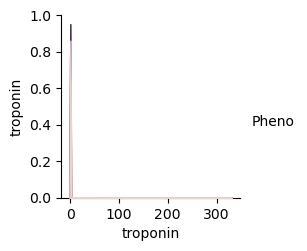

In [25]:
sns.pairplot(combined_df, hue='Pheno')

In [26]:
umap_reducer = umap.UMAP(n_components=2, n_neighbors=25, min_dist=0.99, random_state=42)
umap_result = umap_reducer.fit_transform(combined_df)

/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [27]:
print(umap_result)
print(len(umap_result))

[[ -3.2311573   1.1681168]
 [ -5.3628635   1.0574523]
 [-16.031796   -3.802812 ]
 ...
 [ 30.751095    1.6922907]
 [ 27.865877   -0.3923842]
 [ 16.602604   -6.8645577]]
140521


In [28]:
display(umap_result[:, 0])
display(umap_result[:, 1])

array([ -3.2311573,  -5.3628635, -16.031796 , ...,  30.751095 ,
        27.865877 ,  16.602604 ], dtype=float32)

array([ 1.1681168,  1.0574523, -3.802812 , ...,  1.6922907, -0.3923842,
       -6.8645577], dtype=float32)

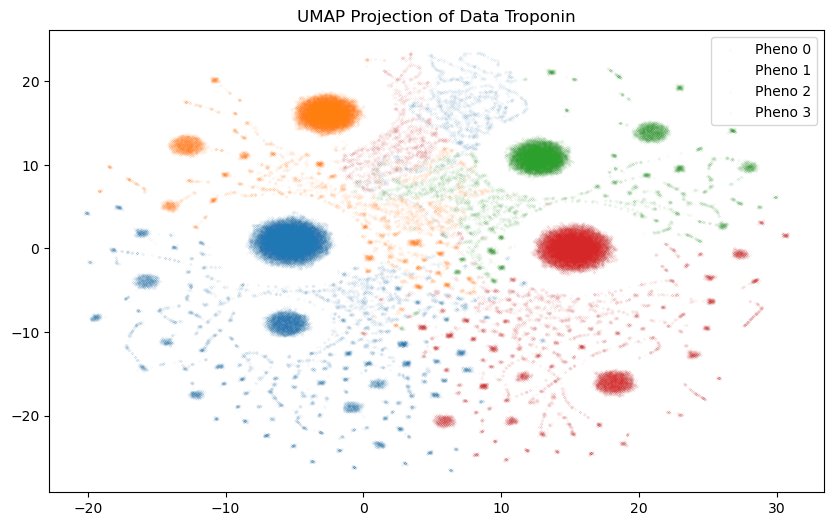

In [31]:
#Plotting 
import matplotlib.cm as cm

# Define a color map with 4 distinct colors
colors = cm.tab10  # You can choose other color maps too

# Create a scatter plot with distinct colors for each Pheno category
plt.figure(figsize=(10, 6))
for pheno_val in range(4):  # Assuming you have 4 Pheno categories
    mask = combined_df['Pheno'] == pheno_val
    plt.scatter(
        umap_result[mask, 0],
        umap_result[mask, 1],
        label=f'Pheno {pheno_val}',
        c=[colors(pheno_val)],
        s=0.001 # Adjust the size parameter (e.g., s=10)
    )

plt.title('UMAP Projection of Data Troponin')
plt.legend()
plt.show()


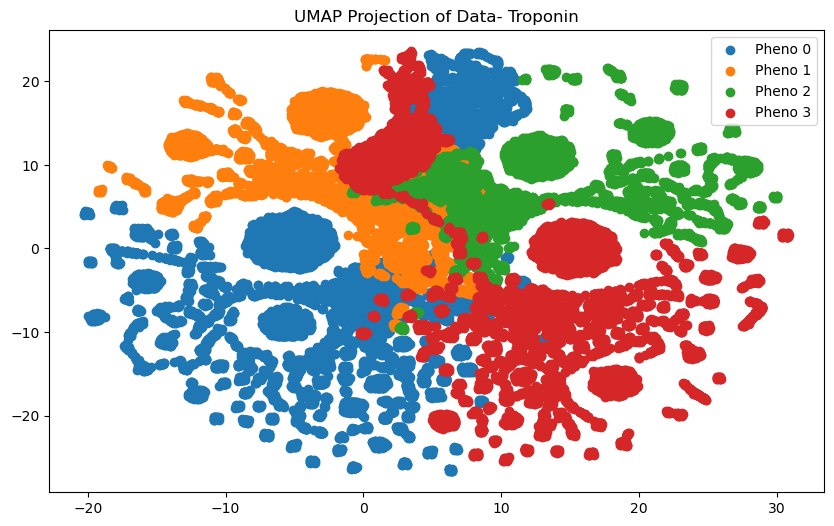

In [32]:
import matplotlib.cm as cm

# Define a color map with 4 distinct colors
colors = cm.tab10  # You can choose other color maps too

# Create a scatter plot with distinct colors for each Pheno category
plt.figure(figsize=(10, 6))
for pheno_val in range(4):  # Assuming you have 4 Pheno categories
    mask = combined_df['Pheno'] == pheno_val
    plt.scatter(umap_result[mask, 0], umap_result[mask, 1], label=f'Pheno {pheno_val}', c=[colors(pheno_val)])

plt.title('UMAP Projection of Data- Troponin')
plt.legend()
plt.show()
